# Uncertainty Sampling, classification example

In [226]:
%matplotlib inline
import numpy as np
import pandas
from plotnine import *

## Toy dataset

In [280]:
size = 200
cov = [[1, 0], [0, 1]]
true_sample = np.random.multivariate_normal(mean = [0,-2], cov=cov, size = size)
false_sample = np.random.multivariate_normal(mean = [0,2], cov=cov, size = size)
x = np.append(true_sample[:,0], false_sample[:,0])
y = np.append(true_sample[:,1], false_sample[:,1])
label = np.repeat([True, False], repeats = size)
data = pandas.DataFrame({'x':x,'y':y,'label':label})

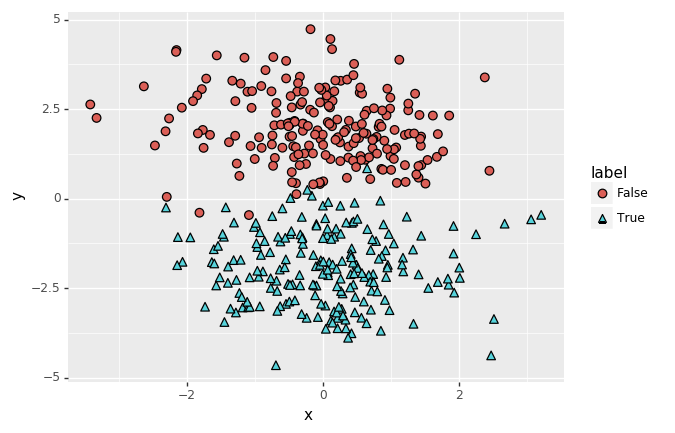

<ggplot: (16440054)>

In [281]:
ggplot(data, aes(x='x', y='y', fill='label', shape='label'))+geom_point(size=3)

In [291]:
def plot_classifier(sample, lg):
    w0 = lg.intercept_[0]
    w1, w2 = lg.coef_[0]
    def boundary(x):
        return (-w0/w2)+(-w1/w2)*x
    return (ggplot(sample, aes(x='x', y='y', fill='label', shape='label'))+\
        geom_point(size=3)+geom_segment(x=-5,xend=5,y=boundary(-5),yend=boundary(5))+\
        geom_point(data, aes(x='x',y='y',color='label')))

## Logistic regression with randomly drawn samples

In [310]:
from sklearn.linear_model import LogisticRegression

In [311]:
sample = data.sample(30)
X = sample[['x','y']]
y = sample.label
lg = LogisticRegression()
lg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

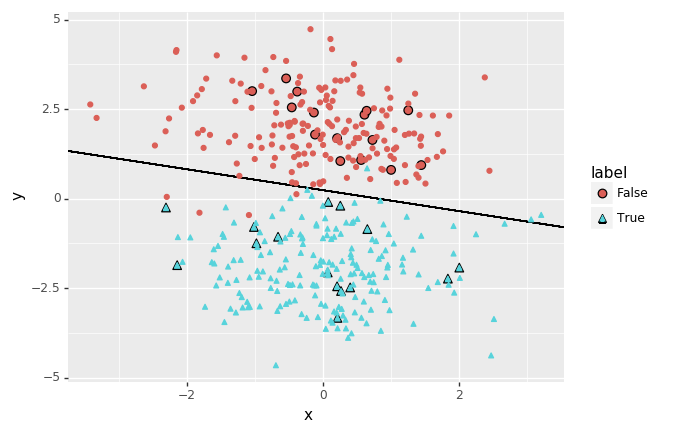

<ggplot: (-9223372036837961286)>

In [312]:
plot_classifier(sample,lg)

## Active learning

In [313]:
sample = data.sample(10)

In [314]:
labeled = sample.index
unlabeled = data.index[~data.index.isin(sample.index)]

In [315]:
for i in range(0,21):
    sample = data.loc[labeled]
    X = sample[['x','y']]
    y = sample.label
    lg = LogisticRegression()
    lg.fit(X,y)
    U = data.loc[unlabeled]    
    preda = lg.predict_proba(U[['x','y']])[:,1]
    xstar_index = U.index[np.argmin(np.abs(preda-0.5))]
    labeled = labeled.insert(0,xstar_index)
    unlabeled = unlabeled.drop(xstar_index)

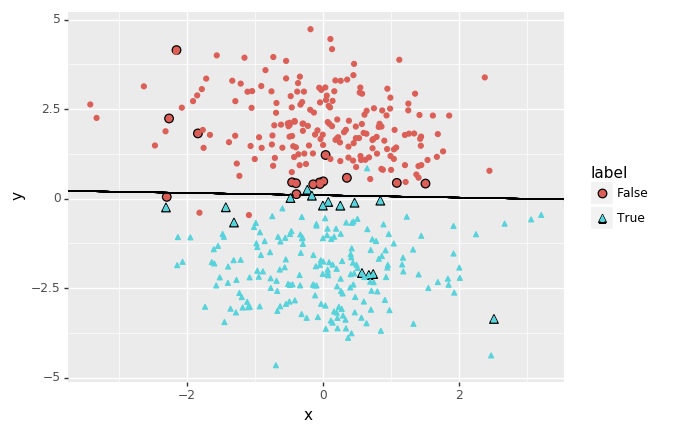

<ggplot: (13576817)>

In [316]:
plot_classifier(sample,lg)